In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import all required libraries

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image
init_notebook_mode(connected=True)
%matplotlib inline

# machine learning
import surprise
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans

!pip install kaleido

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00:00:0100:01


In [14]:
# load the movies rating data (small)
rating_df = pd.read_csv("../input/the-movies-dataset/ratings_small.csv")

In [15]:
# check the raw data
rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [16]:
print("Dimension of the data: ", rating_df.shape)

Dimension of the data:  (100004, 4)


In [17]:
# summary of the data
rating_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [18]:
# load the data into surprise specific data-structure
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)

In [19]:
# default setting: distance MSD, k=10
benchmark = []

# iterate over all algorithms
for algorithm in [SVD(biased=False), KNNBasic(sim_options = {'user_based': True }), KNNBasic(sim_options = {'user_based': False})]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    benchmark.append(tmp)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0062  1.0137  1.0116  1.0074  1.0127  1.0103  0.0030  
MAE (testset)     0.7781  0.7824  0.7805  0.7782  0.7802  0.7799  0.0016  
Fit time          5.83    5.73    5.71    5.96    5.83    5.81    0.09    
Test time         0.16    0.32    0.15    0.14    0.28    0.21    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9700  0.9629  0.9737  0.9701  0.9722  0.9698  0.0037

In [20]:
benchmark = pd.DataFrame(benchmark)

In [21]:
# udpate algrithm names 
new_algorithms = ['PMF','UserCF','ItemCF']
benchmark['Algorithm'] = new_algorithms

benchmark

,test_rmse,test_mae,fit_time,test_time,Algorithm
0,1.010323,0.779888,5.813298,0.208881,PMF
1,0.969791,0.745179,0.193954,1.699945,UserCF
2,0.934227,0.720830,5.351681,7.726554,ItemCF


In [22]:
benchmark2 = []

# iterate over all algorithms
for algorithm in [KNNBasic(sim_options = {'name':'cosine','user_based': True}), KNNBasic(sim_options = {'name':'MSD', 'user_based':True }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': True}),
                 KNNBasic(sim_options = {'name':'cosine', 'user_based':False }),KNNBasic(sim_options = {'name':'MSD', 'user_based':False }),
                 KNNBasic(sim_options = {'name':'pearson','user_based': False}) 
                 ]:
    # perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # store data
    benchmark2.append(tmp)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [23]:
benchmark2 = pd.DataFrame(benchmark2)

In [24]:
# udpate algorithm names 
new_algorithms2 = ['Cosine-UserCF','MSD-UserCF','Pearson-UserCF','Cosine-ItemCF','MSD-ItemCF','Pearson-ItemCF']
benchmark2['Algorithm'] = new_algorithms2

# store results
results2 = benchmark2.set_index('Algorithm').sort_values('test_rmse', ascending=False)
results2

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
Pearson-UserCF,0.999240,0.773870,0.633070,1.672321
Cosine-ItemCF,0.995509,0.774938,16.080617,7.643707
Cosine-UserCF,0.993688,0.767377,0.449267,1.711417
Pearson-ItemCF,0.989434,0.768045,23.178969,7.687374
MSD-UserCF,0.968912,0.744876,0.190593,1.680428
MSD-ItemCF,0.934517,0.721138,5.330979,7.836985


In [25]:
# plotting the results

# prepare the data for plotting
data = results2[['test_rmse', 'test_mae']]
grid = data.values

# create axis labels
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'




In [26]:
# get annotations and hovertext
hovertexts = []
annotations = []

for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.4f}{}: {}{}: {} Fit Time: {:.3f}s Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value,
                   results2.loc[y_value]['fit_time'],
                   results2.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.4f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)



In [27]:
# create trace
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Cross-validated Comparison of Algorithms',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)



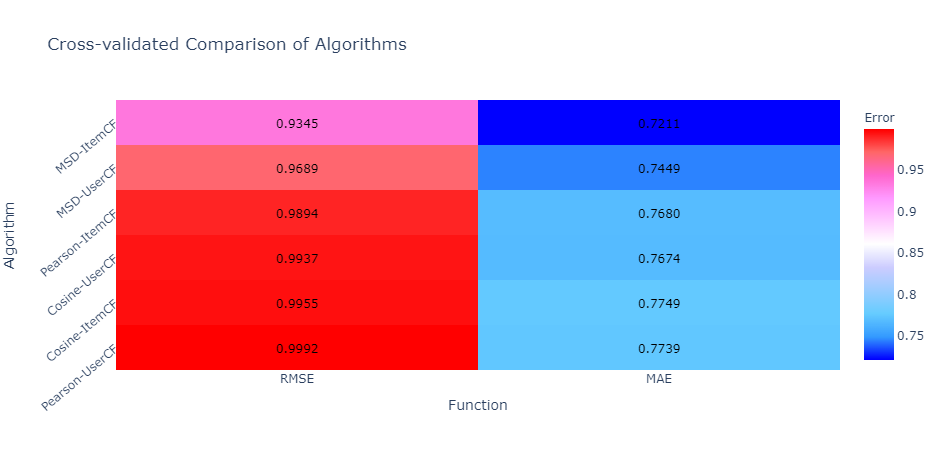

In [62]:
# Create plot
fig = go.Figure(data=[trace], layout=layout)
import plotly.io as pio
pio.show(fig)

In [63]:
# load the data into surprise specific data-structure format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)

In [64]:
# User-based Collaborative Filtering: optimal k
benchmark_ucf = []

for i in range(1,30):
    # perform cross validation
    algorithm =KNNBasic(k=i, sim_options = {'name':'MSD','user_based': True})
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
       
    # Store data
    benchmark_ucf.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [65]:
# Item-based Collaborative Filtering: optimal k
benchmark_icf = []

for i in range(1,30):
    # perform cross validation
    algorithm = KNNBasic(k=i, sim_options = {'name':'MSD','user_based': False})
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # get results & append algorithm names
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        
    # Store data
    benchmark_icf.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [66]:
benchmark_ucf = pd.DataFrame(benchmark_ucf)
benchmark_icf = pd.DataFrame(benchmark_icf)

acc_userCF1 = benchmark_ucf['test_rmse']
acc_itemCF1 = benchmark_icf['test_rmse']

acc_userCF2 = benchmark_ucf['test_mae']
acc_itemCF2 = benchmark_icf['test_mae']

In [67]:
acc_itemCF1

0     1.303981
1     1.139547
2     1.075756
3     1.042033
4     1.019876
5     1.008314
6     0.993368
7     0.986412
8     0.980331
9     0.976075
10    0.972401
11    0.968032
12    0.963180
13    0.961879
14    0.958475
15    0.956906
16    0.955655
17    0.954118
18    0.952635
19    0.951631
20    0.948575
21    0.949986
22    0.948339
23    0.947677
24    0.945544
25    0.944505
26    0.943998
27    0.945132
28    0.945235
Name: test_rmse, dtype: float64

In [68]:
acc_userCF1

0     1.230056
1     1.084220
2     1.037601
3     1.013148
4     0.999405
5     0.990688
6     0.984961
7     0.981920
8     0.979451
9     0.976509
10    0.975842
11    0.973442
12    0.975294
13    0.975427
14    0.975866
15    0.973204
16    0.975600
17    0.975704
18    0.974216
19    0.974814
20    0.975463
21    0.975116
22    0.975942
23    0.975839
24    0.975983
25    0.975493
26    0.976510
27    0.977079
28    0.976819
Name: test_rmse, dtype: float64

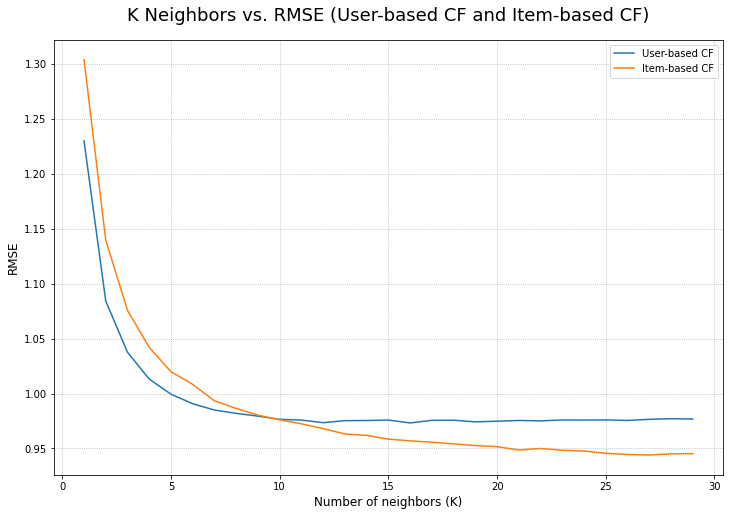

In [69]:
# plotting the results (RMSE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF1, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF1, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. RMSE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (RMSE).png", dpi=300)

plt.show()

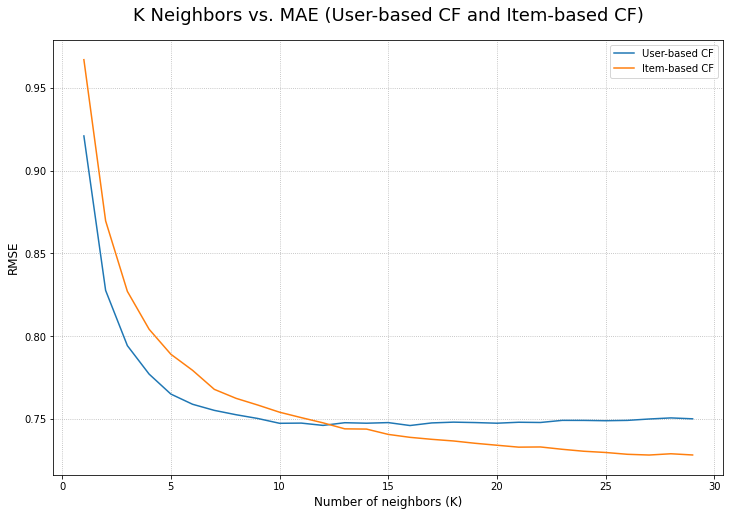

In [70]:
# plotting the results (MAE)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), acc_userCF2, label = "User-based CF")
plt.plot(range(1,30), acc_itemCF2, label = "Item-based CF")
plt.title('')
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.title('K Neighbors vs. MAE (User-based CF and Item-based CF)', fontsize=18, y=1.03)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.savefig("plot_f (MAE).png", dpi=300)

plt.show()

In [71]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of RMSE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF1.idxmin()+1, "with minimum RMSE:", min(acc_userCF1))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF1.idxmin()+1 , "with minimum RMSE:", min(acc_itemCF1))

For User-based CF, the best number of neighbor (K) is at K = 16 with minimum RMSE: 0.9732041839292856
For Item-based CF, the best number of neighbor (K) is at K = 27 with minimum RMSE: 0.9439976468514722


In [72]:
# find out the best number of neighbor (K) for User/Item based collaborative filtering in terms of MAE
print("For User-based CF, the best number of neighbor (K) is at K =" , acc_userCF2.idxmin()+1, "with minimum MAE:", min(acc_userCF2))
print("For Item-based CF, the best number of neighbor (K) is at K =" , acc_itemCF2.idxmin()+1 , "with minimum MAE:", min(acc_itemCF2))

For User-based CF, the best number of neighbor (K) is at K = 16 with minimum MAE: 0.7460507641375642
For Item-based CF, the best number of neighbor (K) is at K = 27 with minimum MAE: 0.7282256346513387
